In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix

<a id="scantronReading_38_encoded-no-past_proficient_score"></a>
# scantronReading_38_encoded, no past_proficient_score

In [4]:
scantronReading_38_encoded_df = pd.read_csv('../dataframes/scantronReading_38_encoded.csv')
scantronReading_38_encoded_df.head()

,studentId,level,dataSource,is_proficient,proficient_score,school_Elementary A,school_Elementary School B,school_Elementary School E,school_Elementary School F,school_Intermediate School E,...,past_proficient_score,subject_math,subject_reading,subject_science,subject_social-studies,subject_music,subject_art,subject_performing-arts,subject_phys-ed,subject_career-prep
0,44777,7,value_scantronReading,False,0.993342,False,False,False,False,False,...,0.969279,2,2,2,2,1,0,0,0,0
1,44783,7,value_scantronReading,False,0.997179,False,False,False,False,False,...,1.009665,2,2,2,1,0,0,0,0,0
2,44784,6,value_scantronReading,False,0.947277,False,False,False,False,False,...,0.934354,2,2,2,2,1,0,0,0,0
3,44807,7,value_scantronReading,True,1.014669,False,False,False,False,False,...,1.028650,2,2,1,2,0,0,0,0,0
4,44809,7,value_scantronReading,False,0.934665,False,False,False,False,False,...,0.949085,2,2,2,2,1,0,0,0,0


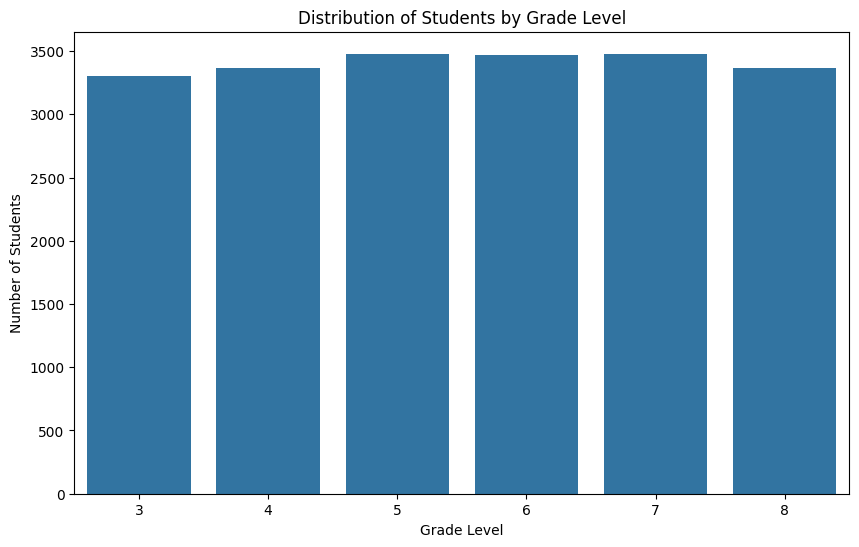

In [5]:
# Create histogram of student grade levels
plt.figure(figsize=(10, 6))
sns.countplot(data=scantronReading_38_encoded_df, x='level')
plt.title('Distribution of Students by Grade Level')
plt.xlabel('Grade Level')
plt.ylabel('Number of Students')
plt.show()

In [6]:
X = scantronReading_38_encoded_df.drop(['studentId', 'dataSource', 'is_proficient', 'proficient_score', 'level', 'past_proficient_score'], axis=1)
y = scantronReading_38_encoded_df['proficient_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=scantronReading_38_encoded_df['is_proficient'])

In [7]:
max_depth = [5,15, 30]
n_estimators = [100,250,400]
param_grid = {'max_depth' : list(max_depth), 'n_estimators' : list(n_estimators)}

In [8]:
# Grid Search to find the best hyperparameters 

print("Running Grid Search")
rf_regressor = RandomForestRegressor()

# will have a 3-fold cross validation 
rf_grid = GridSearchCV(rf_regressor, param_grid, cv=3, scoring='neg_root_mean_squared_error')
rf_grid_search = rf_grid.fit(X_train, y_train)

print("Done")
rf_best_params = rf_grid_search.best_params_

rf_best_params

# {'max_depth': 5, 'n_estimators': 100}

Running Grid Search
Done


{'max_depth': 5, 'n_estimators': 100}

In [9]:
print('Begin Random Forest ')
rf_model = RandomForestRegressor(max_depth=18, n_estimators=350)
rf_model.fit(X_train,y_train)
print('End')

Begin Random Forest 
End


In [10]:
y_pred_continuous = rf_model.predict(X_test)
rsme = mean_squared_error(y_test, y_pred_continuous, squared=False)
r2 = r2_score(y_test, y_pred_continuous)


threshold = 1.1  # ADJUST
y_pred_bool = y_pred_continuous >= threshold
y_test_bool = y_test >= threshold

print("threshold=", threshold)
# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test_bool, y_pred_bool))

# Print the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_bool, y_pred_bool))


print('[RF] Root Mean Squared Error: {0}'.format(rsme))
print('[RF] R2: {0}'.format(r2))        

threshold= 1.1

Classification Report:
              precision    recall  f1-score   support

       False       0.96      1.00      0.98      3912
        True       0.00      0.00      0.00       180

    accuracy                           0.96      4092
   macro avg       0.48      0.50      0.49      4092
weighted avg       0.91      0.96      0.93      4092


Confusion Matrix:
[[3912    0]
 [ 180    0]]
[RF] Root Mean Squared Error: 0.11378224433722257
[RF] R2: 0.004619658824291717


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

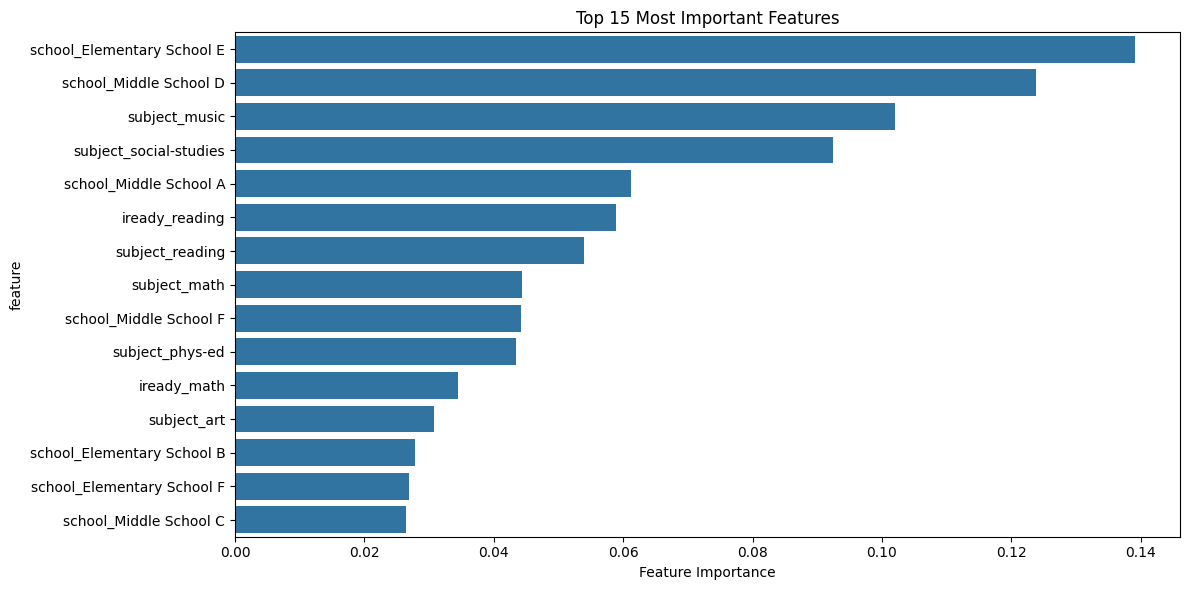


Feature Importance Scores:
                         feature  importance
2     school_Elementary School E    0.139120
7         school_Middle School D    0.123756
15                 subject_music    0.102073
14        subject_social-studies    0.092441
5         school_Middle School A    0.061215
10                iready_reading    0.058860
12               subject_reading    0.053930
11                  subject_math    0.044331
8         school_Middle School F    0.044188
18               subject_phys-ed    0.043424
9                    iready_math    0.034470
16                   subject_art    0.030824
1     school_Elementary School B    0.027823
3     school_Elementary School F    0.026903
6         school_Middle School C    0.026421
19           subject_career-prep    0.024570
13               subject_science    0.024077
0            school_Elementary A    0.020924
17       subject_performing-arts    0.012036
4   school_Intermediate School E    0.008613


In [11]:
# Get feature importance scores
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
})

# Sort features by importance in descending order
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(15))
plt.title('Top 15 Most Important Features')
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.show()

# Print feature importance scores
print("\nFeature Importance Scores:")
print(feature_importance)
